In [42]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20, 6

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

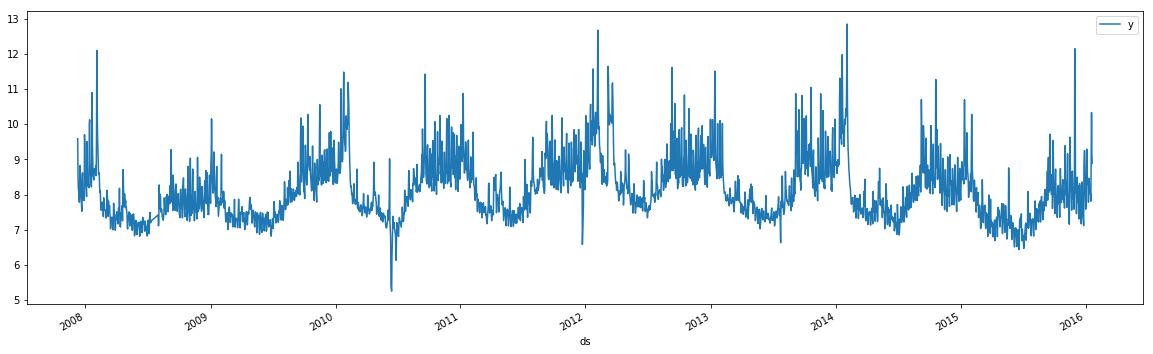

In [43]:
df = pd.read_csv('data/peyton.csv',parse_dates=['ds'])
# df.head()
df.set_index('ds').plot()

In [31]:
def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())

train = df[:730]
test = df[730:730+90]

In [46]:
import pyramid as pm

# help(pm.auto_arima)
import warnings
warnings.filterwarnings("ignore")
arima = pm.auto_arima(train['y'], error_action='ignore', m=7)
#                       ,seasonal=True)

Text(0.5,1,'Actual test samples vs. forecasts')

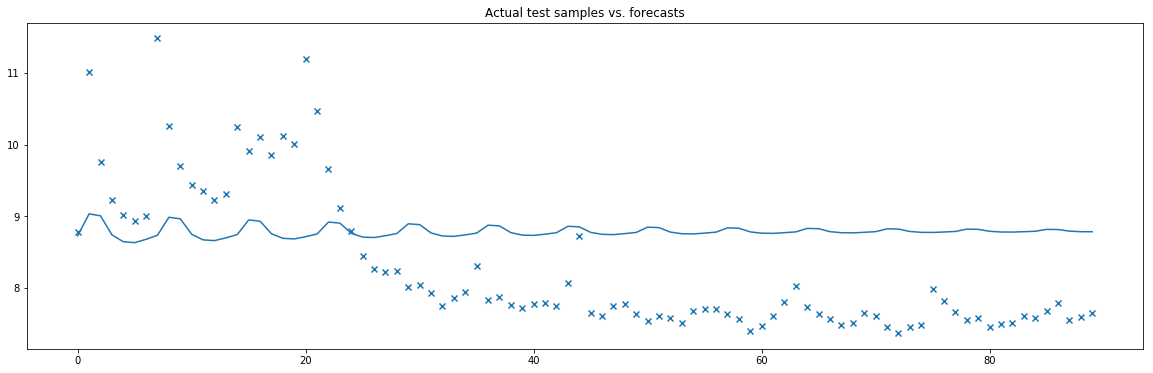

In [47]:
pred = arima.predict(n_periods=90)
plt.scatter(np.arange(90), df[730:730+90]['y'], marker='x')
plt.plot(np.arange(90), pred)
plt.title('Actual test samples vs. forecasts')
plt.show()

In [48]:
rmse(df[730:730+90]['y'],pred)

1.1129988461189324

In [49]:
from fbprophet import Prophet
m = Prophet()
m.fit(train)
future = m.make_future_dataframe(periods=90)
forecast = m.predict(future)
# forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()
# fig1 = m.plot(forecast)

INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


0.6730974034043631

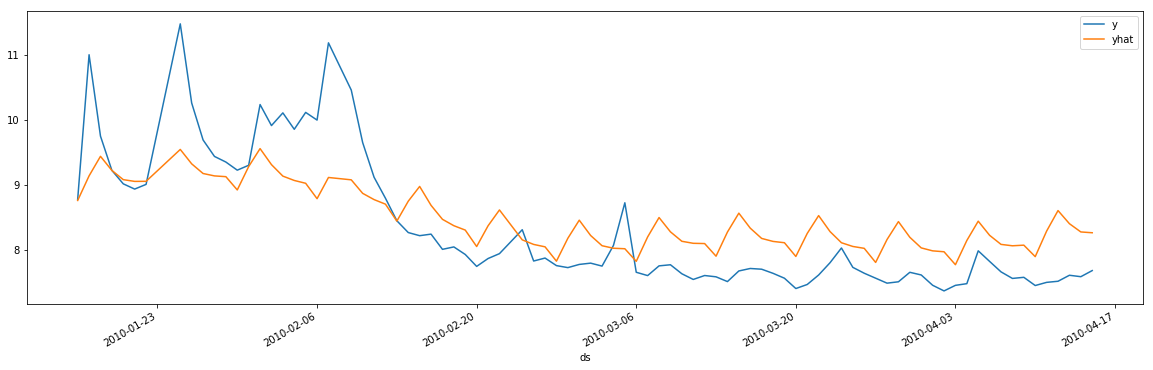

In [50]:
fbOut = test.merge(forecast[['ds','yhat']],on='ds')
fig = fbOut.set_index('ds').plot()

rmse(fbOut['y'],fbOut['yhat'])